# SuSiE RSS workflow with application to chr7 region for BMI and Asthma

We have performed GWAS on UKBB for BMI and Asthma. We found a region on chr7 where there is a signal overlap between these traits. We use fine-mapping to see if there are anything of interest

## Analysis workflow

In [ ]:
[global]
# Path to region extraction files
parameter: region_dir = path
#The region file after LD clumping
parameter: region_file = path

fail_if(not region_file.is_file(), msg = 'Cannot find regions to fine map. Please specify them using ``--region-file`` option.')
# Load all regions of interest. Each item in the list will be a region: (chr, start, end)
regions = list(set([tuple(x.strip().split()) for x in open(region_file).readlines() if x.strip()]))

#The summary statistics file generated after region_extraction
parameter: sumstatFile = f'{region_dir}/{_regions[0]}_{_regions[1]}_{_regions[2]}/{sumstats_path:bn}_{_regions[0]}_{_regions[1]}_{_regions[2]}.sumstats.gz'
#The ld file generated after region_extraction
parameter: ldFile = f'{region_dir}/{_regions[0]}_{_regions[1]}_{_regions[2]}/{sumstats_path:bn}_{_regions[0]}_{_regions[1]}_{_regions[2]}.sample_ld.gz'
#The directory for output files
parameter: cwd = path

In [3]:
[default_1]
parameter: N = int
input: for_each = 'regions', group_by=1
output: f"{cwd:a}/{_input[0]:bnn}.SuSiE_RSS.rds"
R: expand = "${ }"
    sumstat = read.csv(${sumstatFile:r}, sep = '\t', header=T,stringsAsFactors=F)
    ld = read.csv(${ldFile:r}, sep = '\t', header=T, stringsAsFactors=F)
    ld = as.matrix(ld[,-1])
    res = susieR::susie_rss(as.double(sumstat$Z), ld, z_ld_weight = 1/${N}, 
                            L = 10,
                            estimate_residual_variance = TRUE, check_R=F,
                            estimate_prior_variance = TRUE, check_z = F)
    res$pos = as.integer(sumstat$POS)
    res$z = as.double(sumstat$Z)
    res$p = as.double(sumstat$P)
    res$var_names = sumstat$SNP
    saveRDS(res, ${_output:r})

[default_2]
output: f"{_input:n}.png"
R: expand = "${ }"
    res = readRDS(${_input:r})
    png(${_output:r}, width = 8, height=5, unit='in', res=300)
    susieR::susie_plot(res, y="PIP",pos=res$pos)
    dev.off()

In [1]:
%cd ~/tmp/07-Jul-2020

/home/gw/tmp/07-Jul-2020

For asthma,

In [2]:
sos run SuSiE_RSS.ipynb \
    --sumstatFile 7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sumstats.gz \
    --ldFile 7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sample_ld.gz

INFO: Running default_1: 
INFO: default_1 is completed.
INFO: default_1 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds
INFO: Running default_2: 
null device 
          1 
INFO: default_2 is completed.
INFO: default_2 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png
INFO: Workflow default (ID=49992a3b5ba40ed9) is executed successfully with 2 completed steps.


For BMI,

In [3]:
sos run SuSiE_RSS.ipynb \
    --sumstatFile 7_28139386_28259874/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.sumstats.gz \
    --ldFile 7_28139386_28259874/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.population_ld.gz

INFO: Running default_1: 
INFO: default_1 is completed.
INFO: default_1 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds
INFO: Running default_2: 
null device 
          1 
INFO: default_2 is completed.
INFO: default_2 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png
INFO: Workflow default (ID=a77daa7b0b11714f) is executed successfully with 2 completed steps.


## Fine-map results

In [1]:
%cd ~/tmp/07-Jul-2020/output

/home/gw/tmp/07-Jul-2020/output

Asthma:

> ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png (58.9 KiB):

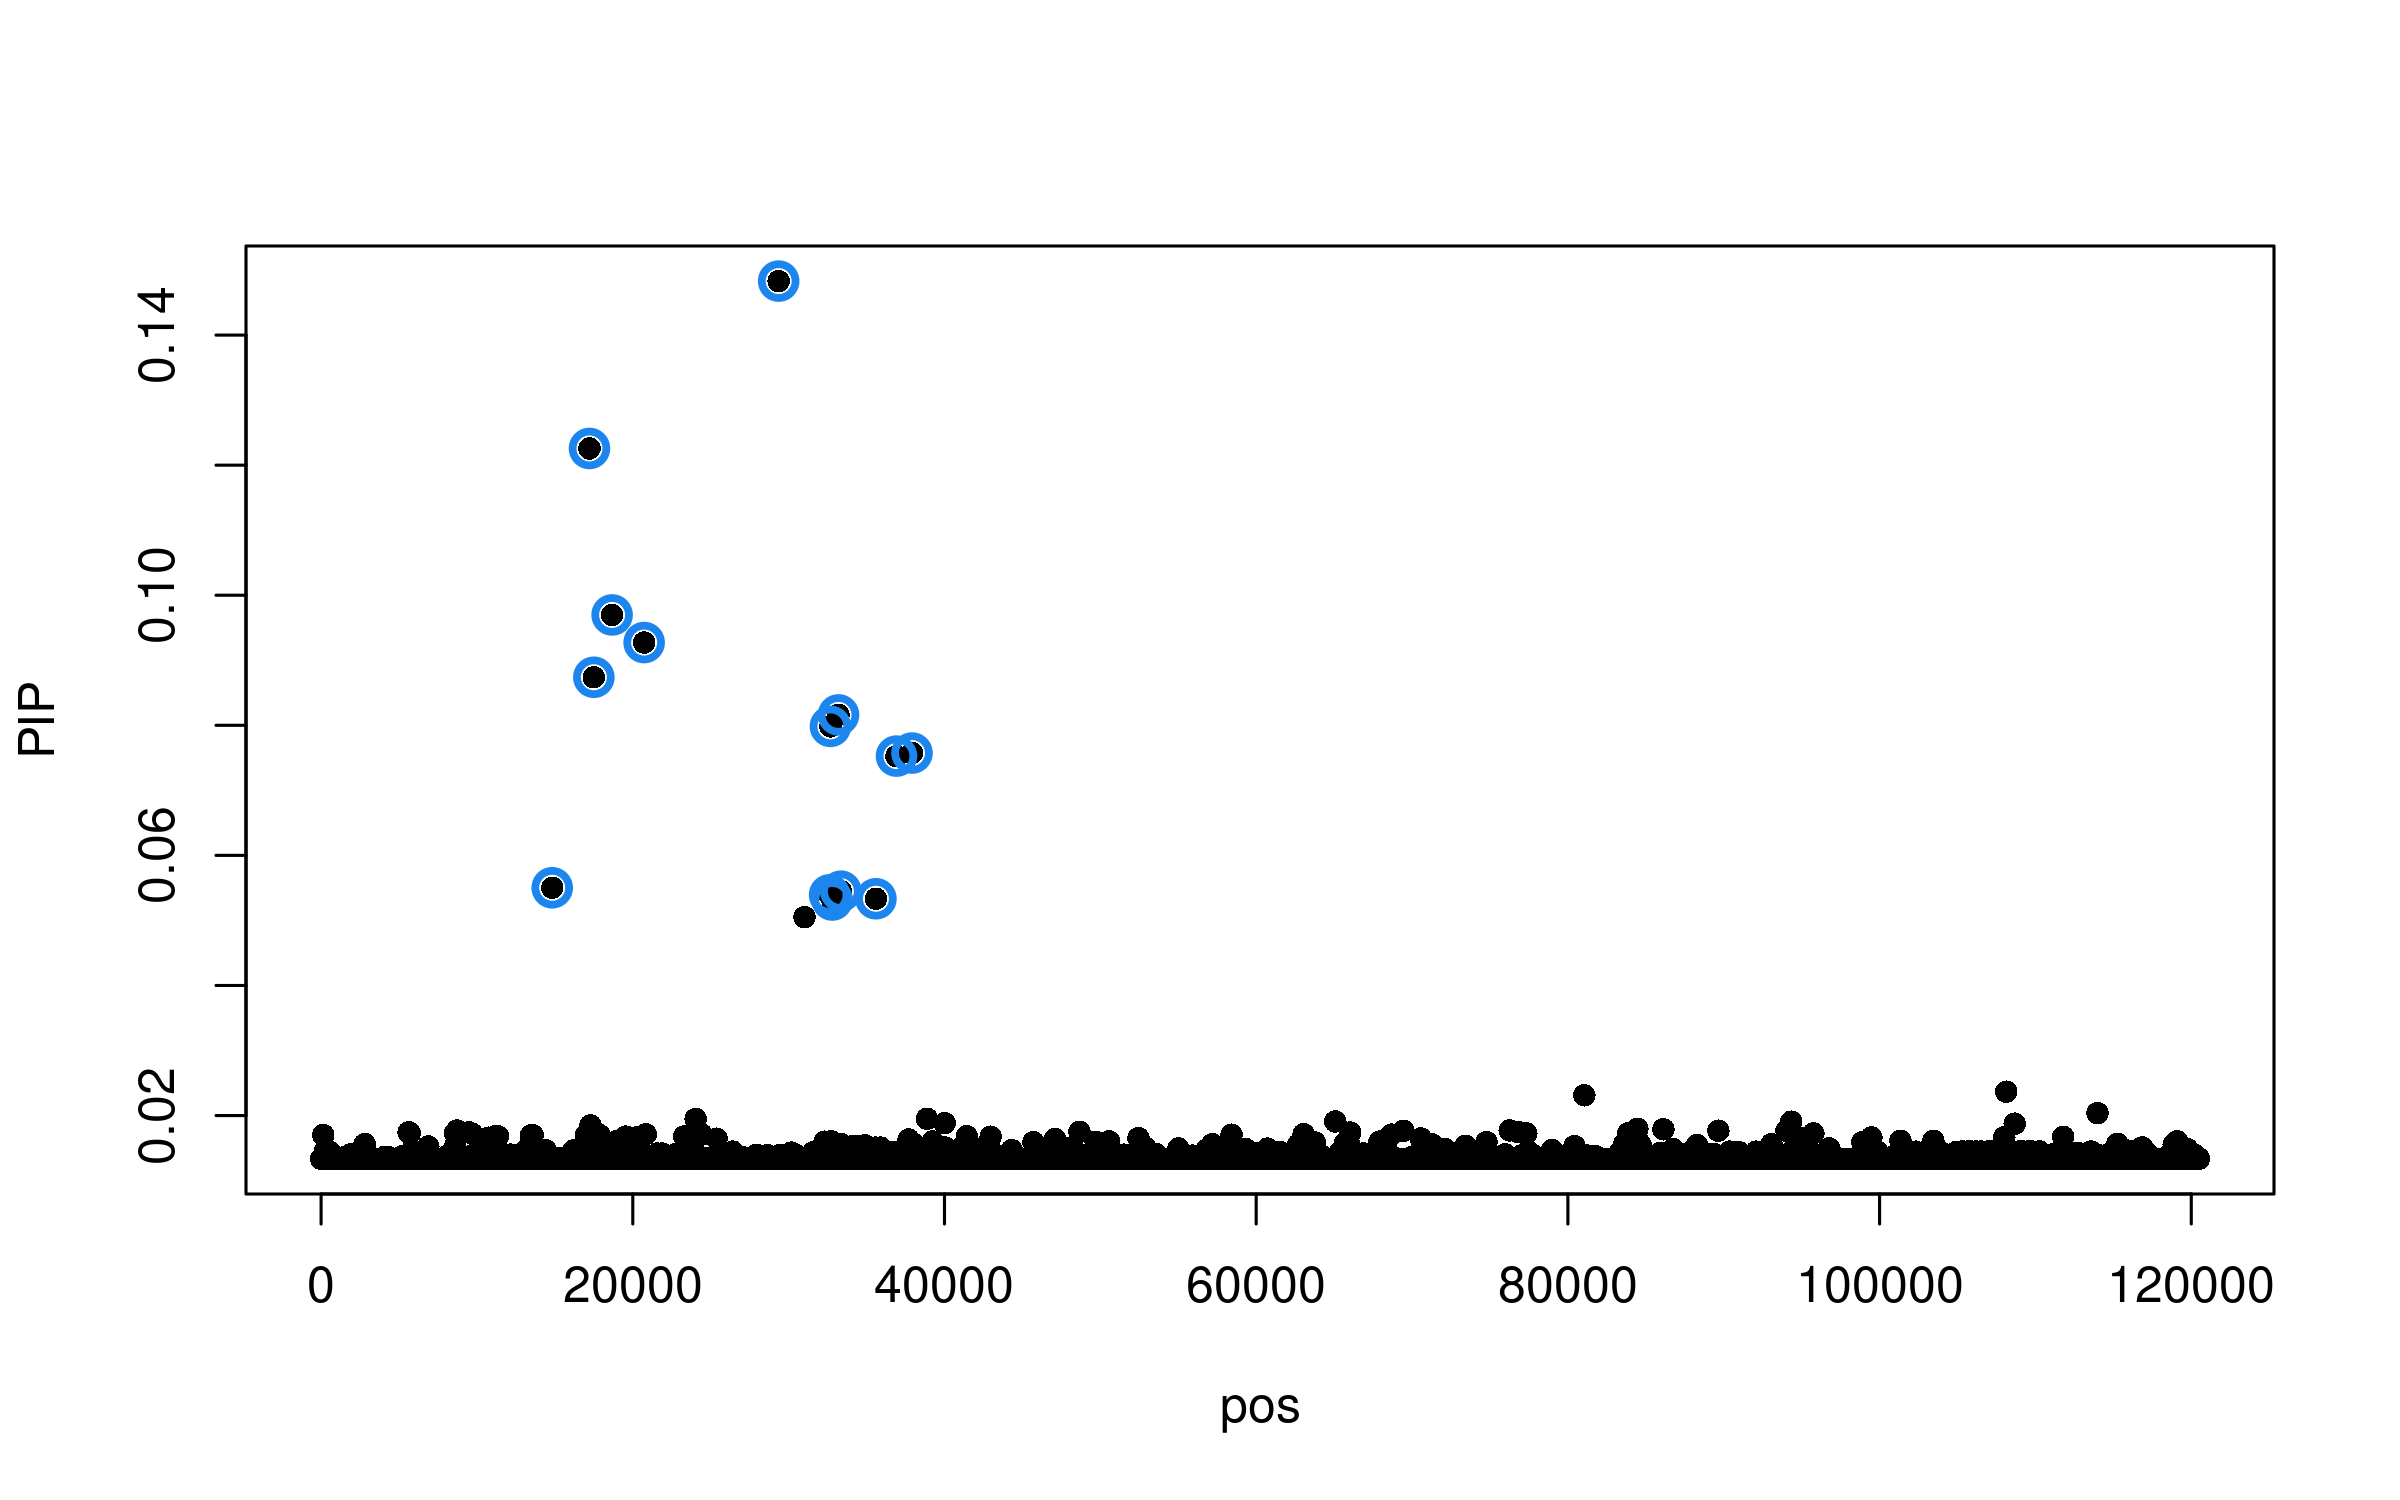

In [5]:
%preview ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png

BMI:

> ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png (68.9 KiB):

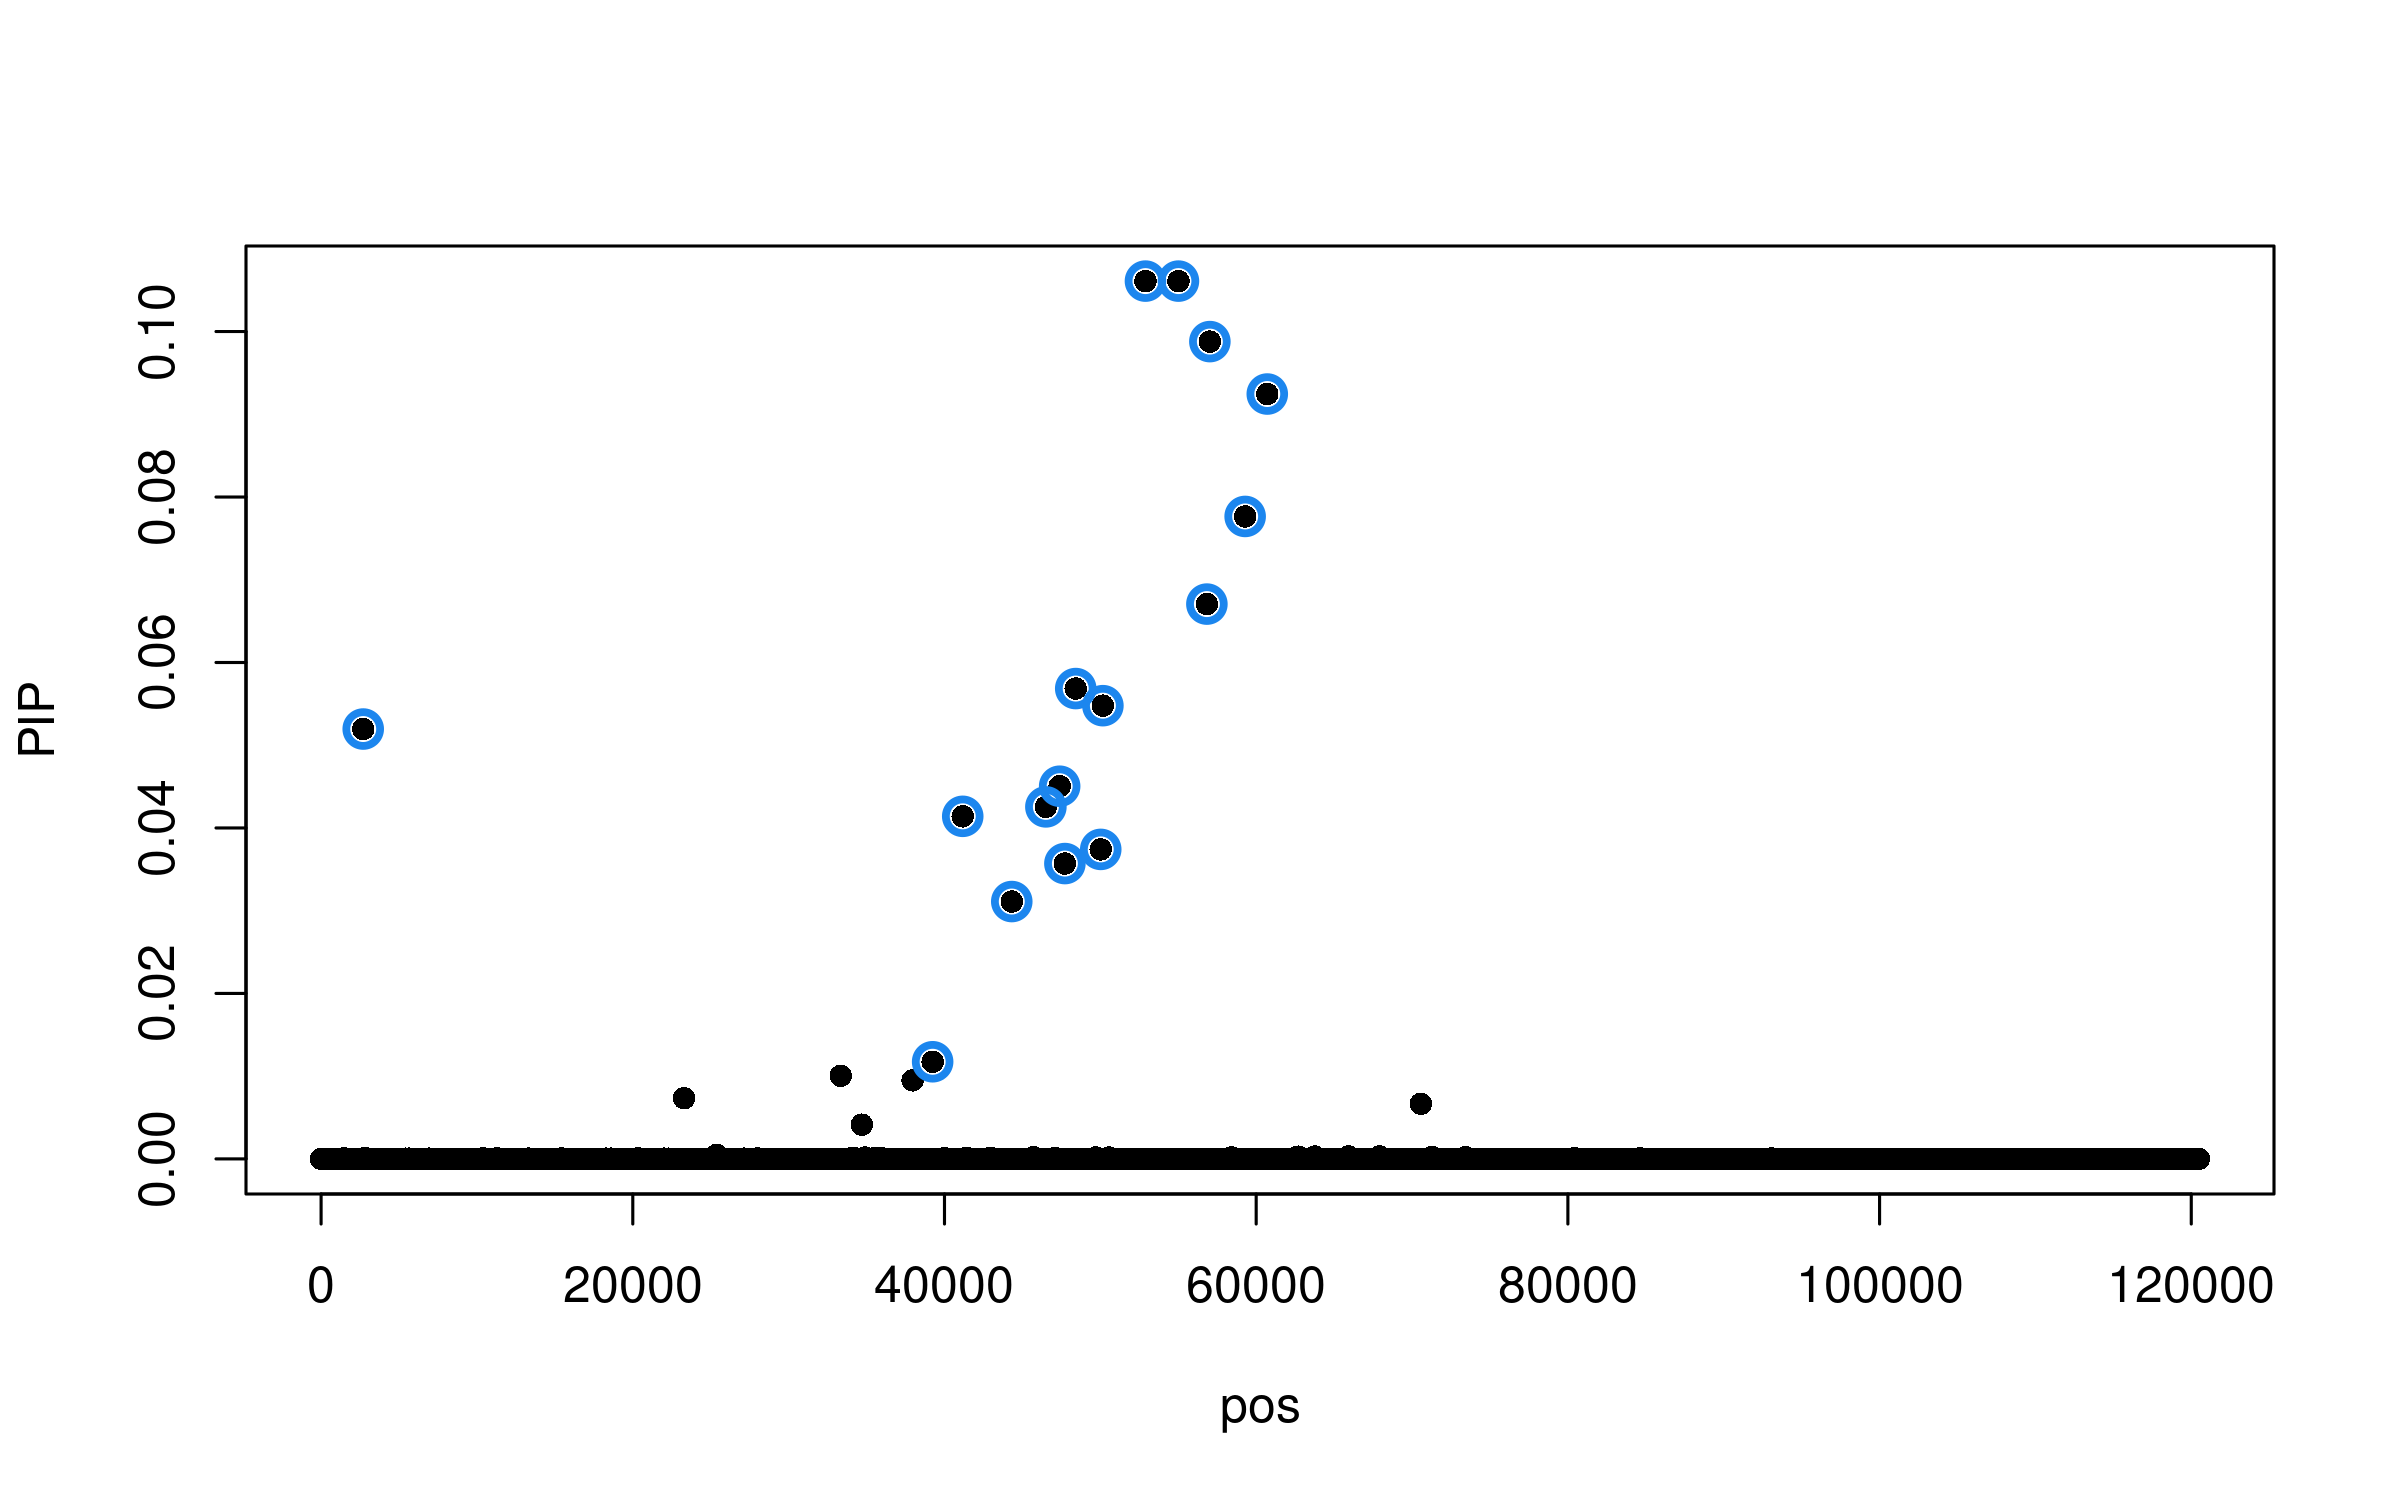

In [6]:
%preview ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png

## Is there evidence of pleiotropy?

Fine-mapping is not meant for a formal analysis of pleiotropy because it analyzes only one phenotype at a time. But at least we can examine overlap between variables in the CS to see if there is an obvious evidence for it.

In [3]:
asthma = readRDS('ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds')
bmi = readRDS('ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds')

Variables in CS:

In [8]:
bmi$sets$cs

$L1
 [1]  24 287 301 318 328 332 335 346 355 356 368 376 385 388 393 406

In [9]:
asthma$sets$cs

$L1
 [1]  93 106 109 115 133 177 189 190 192 193 195 207 212 219

In [10]:
bmi_vars = bmi$var_names[unlist(bmi$sets$cs)]

In [11]:
asthma_vars = asthma$var_names[unlist(asthma$sets$cs)]

In [12]:
bmi_vars

[1] "rs10274928"      "7:28178625_TG_T" "rs864745"        "rs849140"       
 [5] "rs849142"        "rs11455969"      "rs10622246"      "rs1635851"      
 [9] "rs1635852"       "rs1635853"       "rs849133"        "rs860262"       
[13] "rs849134"        "rs849135"        "rs1708302"       "rs1513272"

In [13]:
asthma_vars

[1] "7:28154215_GT_G"    "rs4722758"          "rs6977955"         
 [4] "rs4719922"          "rs9648346"          "7:28168745_GTCTT_G"
 [7] "rs2189965"          "rs2189966"          "rs4722760"         
[10] "rs917115"           "rs917116"           "rs67250450"        
[13] "rs917117"           "rs11495981"

In [14]:
intersect(bmi_vars, asthma_vars)

character(0)

There is no intersect between BMI and Asthma variables -- it does not seem to have a pleiotropy effect looking at the fine mapping result. **Also recall that BMI analysis controlled for Asthma as a covariate.**

## A concern with Asthma result

Previously when only the genotyped (and not imputed) variants were analyzed, the top SNP from the region is `rs849335`. Now this SNP does not show up in the one CS detected.

Assuming SuSiE-RSS does a good job, then there are two possibilities for this outcome:

1. `rs849335` has so many other SNPs in LD with it, that the signal diffuses over these SNPs and each would have very small PIP.
2. `rs849335` is in fact in high LD with the current lead SNP, and conditional on the current lead SNP it has no signals left.

Below we look into this in some more detail.

In [4]:
res = data.frame(cbind(asthma$var_names, asthma$pos - 28139386, asthma$pip, asthma$p, asthma$z), stringsAsFactors=F)
colnames(res) = c('rsID', 'pos', 'PIP', 'p-value', 'z-score')

Minimum p-value,

In [5]:
min(as.double(res[,4]))

[1] 6.71191e-14

### Rank top SNPs by PIP

In [16]:
tops_pip = head(res[order(abs(as.double(res[,3])), decreasing = T),], 30)
tops_pip

,rsID,pos,PIP,p-value,z-score
,<chr>,<chr>,<chr>,<chr>,<chr>
177,7:28168745_GTCTT_G,29359,0.148300741309118,6.71191e-14,-7.4933860634063
106,rs4722758,17220,0.122569553724706,1.07378e-13,-7.43149384462692
115,rs4719922,18672,0.0969732374700084,1.41832e-13,-7.39460241855153
133,rs9648346,20727,0.0927256991863974,1.49718e-13,-7.38740858083148
109,rs6977955,17501,0.0873877886197116,1.61025e-13,-7.37771847780265
193,rs917115,33200,0.0815996744871706,1.36404e-13,-7.39978613584123
190,rs2189966,32680,0.0798339154372878,1.40192e-13,-7.39614776404627
219,rs11495981,37915,0.0757385984213301,1.92604e-13,-7.35383185092227
212,rs917117,36919,0.0752676267824227,1.94069e-13,-7.35281945240773


We observe:

1. The SNP with smallest p-value in this region is the one with highest PIP. This is expected.
2. Some SNPs with large p-value, eg, `rs3735568`, still have non-zero PIP although it is very small (0.0177). This is somewhat counter-intuitive but we'll not dig into it now (0.0177 is not a large number anyways).

### Rank SNPs by p-value, for those not in any CS

In [17]:
tops = head(res[order(abs(as.double(res[,4])), decreasing = F),], 30)

In [18]:
tops[!(tops$rsID %in% asthma_vars),]

,rsID,pos,PIP,p-value,z-score
,<chr>,<chr>,<chr>,<chr>,<chr>
186,rs2893312,31017,0.0505057404232577,3.29927e-13,-7.28158241232796
226,rs4722762,38876,0.0195050396927382,2.11981e-12,-7.02636663632589
608,rs113364328,116144,0.0134649099166875,1.03514e-10,-6.46172805979182
167,rs740122,27056,0.0135710121955425,1.68047e-10,-6.388020332317
518,rs10264306,100080,0.0134016005693308,2.00058e-10,-6.36129637272432
140,rs10951192,21647,0.0135755927857129,2.15719e-10,-6.34971156970645
438,rs849335,84604,0.015700411986643,3.02806e-10,6.29733520704548
20,rs10245867,2800,0.015617147751838,3.98812e-10,-6.2544919625055
488,rs849327,93071,0.0155997436594902,4.74629e-10,6.2272712449011


There are many SNPs with small p-value not in any CS. The previous top SNP, `rs849335`, is not in any CS, but it has p-value `3.02806e-10`.

### Are there many SNPs in LD with `rs849335` thus diffused the signal?

My first thought is that if a SNP, eg `rs849335` has too many other SNPs in high LD with it, then perhaps the PIP will be "diffused" over all of them. Say, if there are 10 other SNPs in complete LD with it (although apparently it cannot be the case just by looking at the p-values), then even if it is a true non-zero effect variable, the actual PIP it gets cannot be higher than 0.1. 

Let's see how many variables are in high LD with it:

In [6]:
ld = '../7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sample_ld.gz'
ld = read.csv(ld, sep = '\t', header=T, stringsAsFactors=F)

In [7]:
ld_i = ld[which(ld[,1] == 'rs849335'),][-1]

In [8]:
ld_i

,X7_28139386_C_T,X7_28139509_C_T,X7_28139523_C_G,X7_28139640_A_G,X7_28139948_A_G,X7_28140381_A_AT,X7_28140706_C_T,X7_28140852_C_T,X7_28140896_G_T,X7_28140931_C_T,⋯,X7_28258257_A_AAG,X7_28258261_G_GA,X7_28258382_G_T,X7_28258482_G_GAA,X7_28259131_A_G,X7_28259233_C_T,X7_28259411_C_T,X7_28259461_C_T,X7_28259623_A_G,X7_28259874_A_T
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
438,-0.425716,-0.06309077,0.02010503,0.07383023,0.02652947,-0.3871831,-0.06200883,0.01290388,0.03127049,0.03052041,⋯,-0.3596756,-0.359572,-0.1033223,-0.3361392,-0.3763824,-0.5750193,-0.06798358,-0.04278112,0.01569834,0.3155805


In [9]:
high_ld = which(ld_i>0.8)

In [10]:
high_ld

[1] 417 438 439 488 610

In [11]:
res[high_ld,]

,rsID,pos,PIP,p-value,z-score
,<chr>,<chr>,<chr>,<chr>,<chr>
417,rs849333,80426,0.0153057485482219,4.82443e-10,6.22471147744444
438,rs849335,84604,0.015700411986643,3.02806e-10,6.29733520704548
439,rs849336,84667,0.015479443193906,4.9318e-10,6.22125939937902
488,rs849327,93071,0.0155997436594902,4.74629e-10,6.2272712449011
610,rs498475,116854,0.0150975877388231,3.96267e-09,5.88574411917802


It is not many of them at all, but all their PIPs are small. The sum is

In [12]:
sum(as.double(res[high_ld,3]))

[1] 0.07718294

### Is `rs849335` in high LD with the current top SNP?

In [15]:
ld[which(ld[,1] == 'rs849335'),which(ld[,1] == '7:28168745_GTCTT_G')+1]

[1] -0.6456174

LD between these SNPs is -0.64, which is not too small. Is it possible that conditional on `7:28168745_GTCTT_G`, `rs849335` is no longer significant? 

A formal assessment of this would involve analyzing the full data -- we need to get the phenotypes and covariates loaded. For now to get a rough idea, I'll exclude the current top signal from the analysis and see if `rs849335` now gets picked up. That is, limit analysis to indices 300 to 600, because the one CS for asthma only has variables under 300 index range (`asthma$sets$cs`).

In [17]:
z = as.double(res$z)
ld = as.matrix(ld[,-1])

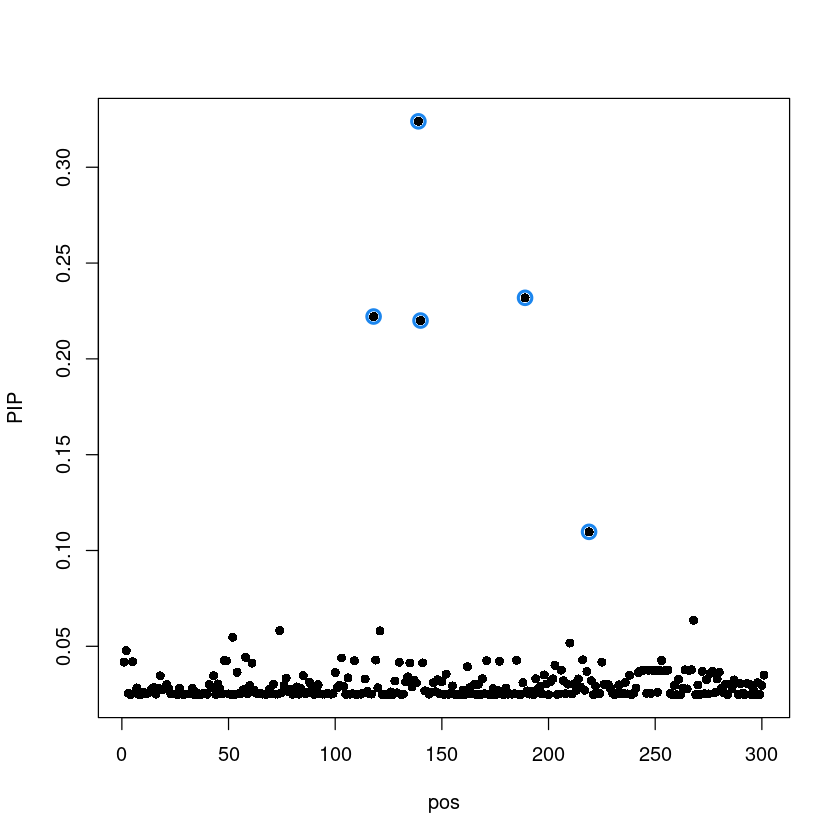

In [28]:
res2 = susieR::susie_rss(z[300:600], ld[300:600,300:600], z_ld_weight = 1/339353, 
                        L = 10,
                        estimate_residual_variance = TRUE, check_R=F,
                        estimate_prior_variance = TRUE, check_z=F)
susieR::susie_plot(res2, y="PIP")

In [31]:
res$rsID[300:600][unlist(res2$sets$cs)]

[1] "rs849333"   "rs849335"   "rs849336"   "rs849327"   "rs10264306"

This time `rs849335` has PIP 0.3, also, the minimum LD in this set is 0.65.

In [32]:
res2$sets

,min.abs.corr,mean.abs.corr,median.abs.corr
,<dbl>,<dbl>,<dbl>
L1,0.6572982,0.8860477,0.9673192


### Use a large, fixed prior variance

Previous analysis allows estimating the prior variance hyperparameter directly from data. Here let's set it to a somewhat large number. We expect many more signals to be discovered but some can be false positives. We want to tweak it to see when we can capture `rs849335` without too much other noises.

The reason I do this analysis is that apparently after removing effect of the current top SNP, the model thinks there is zero variations left to be explained by `rs849335`. But if I force all SNPs to potentially explain some variation by setting it to a fixed non-zero prior, then some additional SNPs should pop up. I just want to see if `rs849335` is one of them.

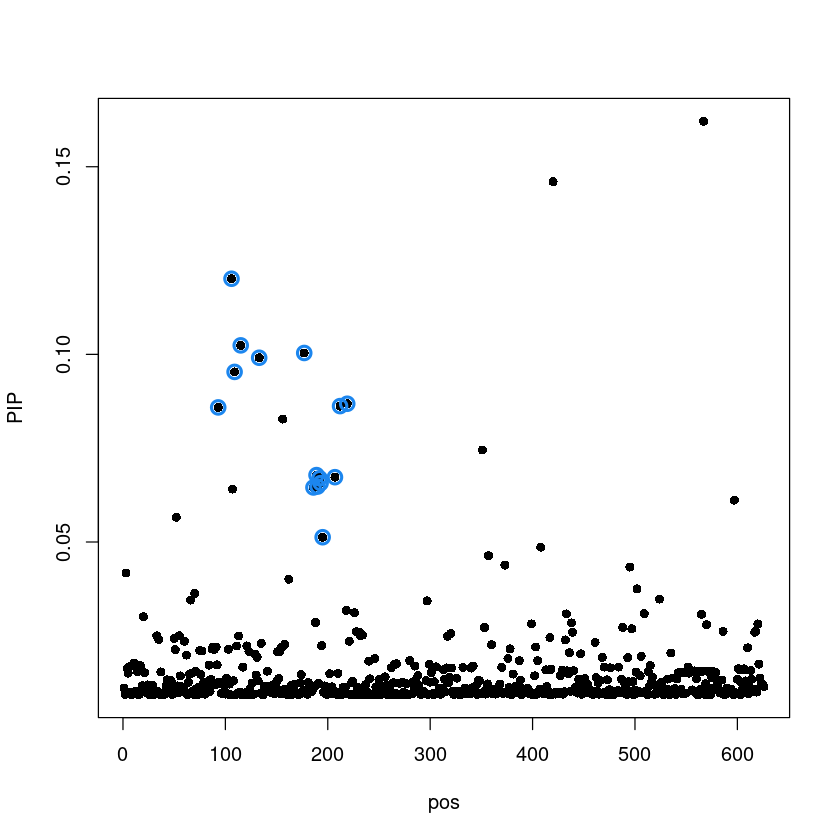

In [36]:
res3 = susieR::susie_rss(z, ld, z_ld_weight = 1/339353, 
                        L = 10,
                        estimate_residual_variance = TRUE, check_R=F,
                        estimate_prior_variance = F, prior_variance = 5, check_z=F)
susieR::susie_plot(res3, y="PIP")

Some additional variables poped up, but `rs849335` is not one of them anyways:

In [37]:
res3$pip[which(res$rsID == 'rs849335')]

[1] 0.02845133

The two SNPs popping up on the right side of the plot are,

In [40]:
res$rsID[which(res3$pip>0.13)]

[1] "7:28220442_GC_G" "rs11448038"

Their LD with `rs849335` are

In [41]:
ld[which(res3$pip>0.13), which(res$rsID=='rs849335')]

[1] 0.3545308 0.3954143

There LD with the current top SNP (by p-value) are:

In [42]:
ld[which(res3$pip>0.13), which(res$rsID=='7:28168745_GTCTT_G')]

[1] -0.2250776 -0.2609999

## Next fine-mapping workflows to develop

or not?

1. Try FINEMAP see if we end up the same results.
2. Try running full data version of SuSiE focusing only on unrelated individuals.